Plotting
============================

This tutorial explains the high-level interface to plotting provided by the Bundle.  You are of course always welcome to access arrays and plot manually.

As of PHOEBE 2.1, PHOEBE uses [autofig](https://autofig.readthedocs.io) as an intermediate layer for highend functionality to [matplotlib](http://matplotlib.org).

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

This first line is only necessary for ipython noteboooks - it allows the plots to be shown on this page instead of in interactive mode

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.


In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()
b['q'] = 0.8
b['ecc'] = 0.1
b['irrad_method'] = 'none'

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.


And we'll attach some dummy datasets.  See [Datasets](datasets.ipynb) for more details.

In [3]:
b.add_dataset('orb', compute_times=np.linspace(0,4,1000), dataset='orb01', component=['primary', 'secondary'])

times, fluxes, sigmas = np.loadtxt('test.lc.in', unpack=True)

b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01')

<ParameterSet: 43 parameters | contexts: constraint, figure, dataset, compute>

And run the forward models.  See [Computing Observables](compute.ipynb) for more details.

In [4]:
b.set_value('incl@orbit', 90)
b.run_compute(model='run_with_incl_90') 

b.set_value('incl@orbit', 85)
b.run_compute(model='run_with_incl_85')

b.set_value('incl@orbit', 80)
b.run_compute(model='run_with_incl_80')

<ParameterSet: 18 parameters | contexts: model, figure>

Showing and Saving
-----------------------

**NOTE:** in IPython notebooks calling plot will display directly below the call to plot.  When not in IPython you have several options for viewing the figure:

- call [b.show](../api/phoebe.parameters.ParameterSet.show.md) or [b.savefig](../api/phoebe.parameters.ParameterSet.savefig.md) after calling [plot](../api/phoebe.parameters.ParameterSet.plot.md).
- use the returned autofig and matplotlib figures however you'd like
- pass `show=True` to the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method.
- pass `save='myfilename'` to the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method, which is the same as calling `plt.savefig('myfilename')`.

Default Plots
-----------------

To see the options for plotting that are dataset-dependent see the tutorials on that dataset method:

- [ORB dataset](ORB.ipynb)
- [MESH dataset](MESHipynb)
- [LC dataset](LC.ipynb)
- [RV dataset](RV.ipynb)
- [LP dataset](LP.ipynb)

By calling the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method on the bundle (or any ParameterSet) without any arguments, a plot or series of subplots will be built based on the contents of that ParameterSet.

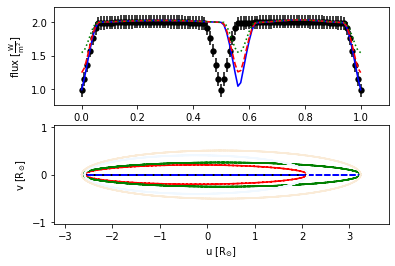

In [5]:
afig, mplfig = b.plot(show=True)

Any call to plot returns 2 objects - the autofig and matplotlib figure instances.  Generally we won't need to do anything with these, but having them returned could come in handy if you want to manually edit either before drawing/saving the image.

In this example with so many different models and datasets, it is quite simple to build a single plot by filtering the bundle and calling the plot method on the resulting ParameterSet.

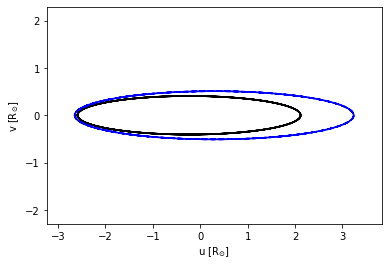

In [6]:
afig, mplfig = b['orb@run_with_incl_80'].plot(show=True)

Time (highlight and uncover)
----------------------------------------------

The built-in plot method also provides convenience options to either highlight the interpolated point for a given time, or only show the dataset up to a given time.

### Highlight

The higlight option is enabled by default so long as a time (or times) is passed to plot.  It simply adds an extra marker at the sent time - interpolating in the synthetic model if necessary.

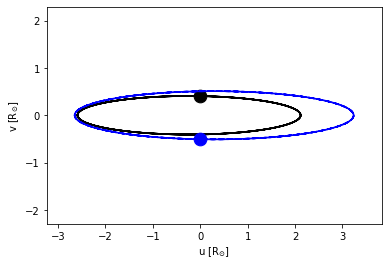

In [7]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, show=True)

To change the style of the "highlighted" points, you can pass matplotlib recognized [markers](http://matplotlib.org/api/markers_api.html), [colors](http://matplotlib.org/api/colors_api.html), and markersizes to the highlight_marker, highlight_color, and highlight_ms keywords, respectively.

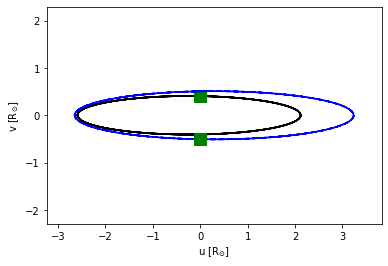

In [8]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, highlight_marker='s', highlight_color='g', highlight_ms=20, show=True)

To disable highlighting, simply send highlight=False

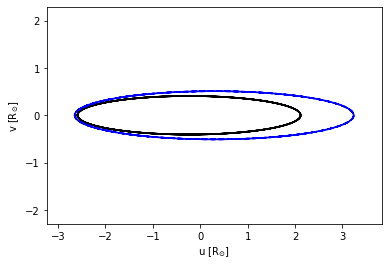

In [9]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, highlight=False, show=True)

### Uncover

Uncover shows the observations or synthetic model up to the provided time and is disabled by default, even when a time is provided, but is enabled simply by providing uncover=True.  There are no additional options available for uncover.



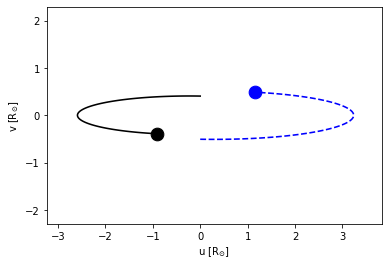

In [10]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=0.5, uncover=True, show=True)

Selecting Datasets
-------------------------

In addition to filtering and calling plot on the resulting ParameterSet, plot can accept a twig or filter on any of the available parameter tags.

For this reason, any of the following give identical results:

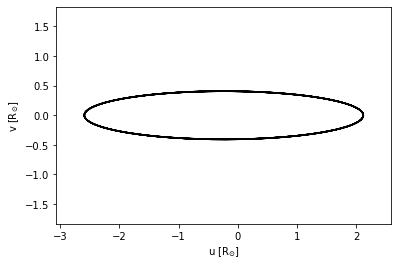

In [11]:
afig, mplfig = b['primary@orb@run_with_incl_80'].plot(show=True)

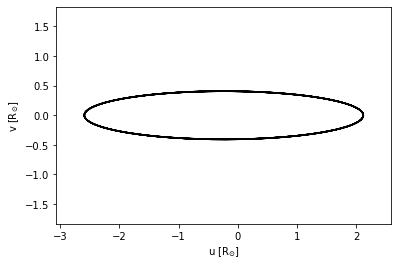

In [12]:
afig, mplfig = b.plot(component='primary', kind='orb', model='run_with_incl_80', show=True)

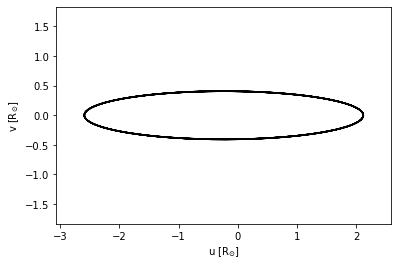

In [13]:
afig, mplfig = b.plot('primary@orb@run_with_incl_80', show=True)

Selecting Arrays
--------------------

So far, each plotting call automatically chose default arrays from that dataset to plot along each axis.  To override these defaults, simply point to the qualifier of the array that you'd like plotted along a given axis.

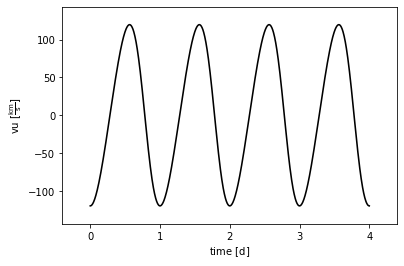

In [14]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', y='vus', show=True)

To see the list of available qualifiers that could be passed for x or y, call the qualifiers (or twigs) property on the ParameterSet.

In [15]:
b['orb01@primary@run_with_incl_80'].qualifiers

['times', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws']

For more information on each of the available arrays, see the relevant tutorial on that dataset method:

- [ORB dataset](ORB.ipynb)
- [MESH dataset](MESH.ipynb)
- [LC dataset](LC.ipynb)
- [RV dataset](RV.ipynb)
- [LP dataset](LP.ipynb)

### Selecting Phase

And to plot in phase we just send x='phases' or x='phases:binary'.

Setting x='phases' will use the ephemeris from the top-level of the hierarchy
(as if you called b.get_ephemeris()), whereas passing a string after the colon, 
will use the ephemeris of that component.

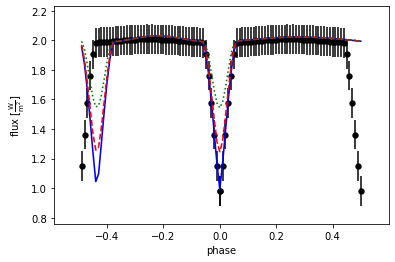

In [16]:
afig, mplfig = b.plot(dataset='lc01', x='phases', z=0, show=True)

Note that when plotting in phase, PHOEBE will automatically sort and connect points in phase-order when plotting against phase **if** the system is not time-dependent (see [b.hierarchy.is_time_dependent](../api/phoebe.parameters.HierarchyParameter.is_time_dependent.md)).  Otherwise, the points will be sorted and conencted in time-order - with breaks automatically applied to handle intelligent phase-wrapping.  In the vast majority of cases, this default behavior should make sense, but can always be overridden by passing 'times' or 'phases' to `i` (see the [plot API docs](../api/phoebe.parameters.ParameterSet.plot.md) for more details).

Units
---------------------

Likewise, each array that is plotted is automatically plotted in its default units. To override these defaults, simply provide the unit (as a string or as a astropy units object) for a given axis.

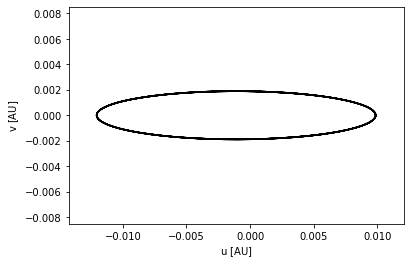

In [17]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xunit='AU', yunit='AU', show=True)

**WARNING**: when plotting two arrays with the same dimensions, PHOEBE attempts to set the aspect ratio to equal, but overriding to use two different units will result in undesired results.  This may be fixed in the future, but for now can be avoided by using consistent units for the x and y axes when they have the same dimensions.

Axes Labels
--------------------

Axes labels are automatically generated from the qualifier of the array and the plotted units.  To override these defaults, simply pass a string for the label of a given axis.

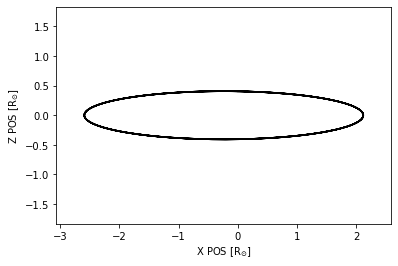

In [18]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xlabel='X POS', ylabel='Z POS', show=True)

Axes Limits
----------------------

Axes limits are determined by the data automatically.  To set custom axes limits, either use matplotlib methods on the returned axes objects, or pass limits as a list or tuple.

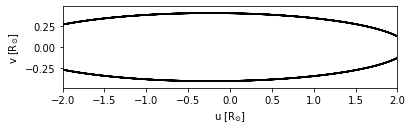

In [19]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xlim=(-2,2), show=True)

Errorbars
------------

In the cases of observational data, errorbars can be added by passing the name of the column.

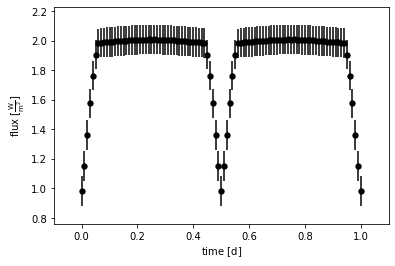

In [20]:
afig, mplfig = b['lc01@dataset'].plot(yerror='sigmas', show=True)

To disable the errorbars, simply set yerror=None.

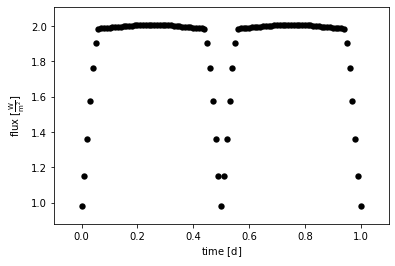

In [21]:
afig, mplfig = b['lc01@dataset'].plot(yerror=None, show=True)

Colors
----------------------

Colors of points and lines, by default, cycle according to matplotlib's color policy.  To manually set the color, simply pass a matplotlib recognized [color](http://matplotlib.org/api/colors_api.html) to the 'c' keyword.

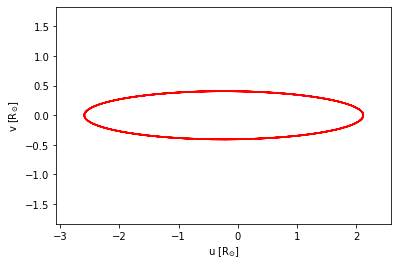

In [22]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(c='r', show=True)

In addition, you can point to an array in the dataset to use as color.

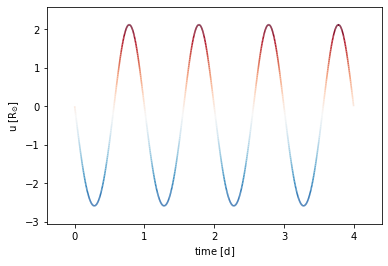

In [23]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', show=True)

Choosing colors works slightly differently for meshes (ie you can set fc for facecolor and ec for edgecolor).  For more details, see the tutorial on the [MESH dataset](MESH.ipynb).

### Colormaps

The colormaps is determined automatically based on the parameter used for coloring (ie RVs will be a red-blue colormap).  To override this, pass a matplotlib recognized [colormap](http://matplotlib.org/api/pyplot_summary.html#matplotlib.pyplot.colormaps) to the cmap keyword.

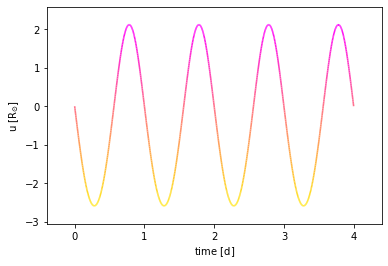

In [24]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', cmap='spring', show=True)

### Adding a Colorbar

To add a colorbar (or sizebar, etc), send draw_sidebars=True to the plot call.

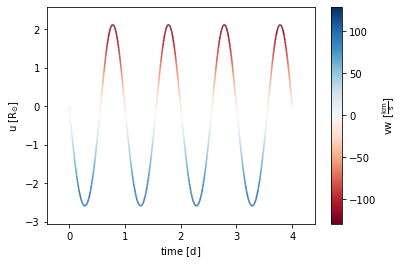

In [25]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', draw_sidebars=True, show=True)

Labels and Legends
-----------------------

To add a legend, include legend=True.

For details on placement and formatting of the legend see [matplotlib's documentation](http://matplotlib.org/users/legend_guide.html#plotting-guide-legend).

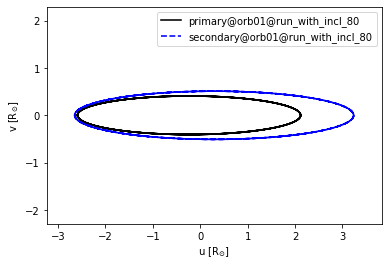

In [26]:
afig, mplfig = b['orb@run_with_incl_80'].plot(show=True, legend=True)

The legend labels are generated automatically, but can be overriden by passing a string to the label keyword.

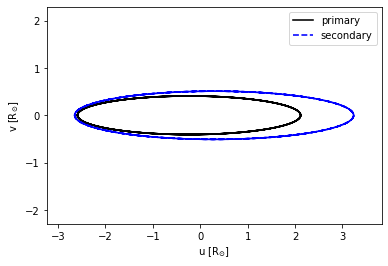

In [27]:
afig, mplfig = b['primary@orb@run_with_incl_80'].plot(label='primary')
afig, mplfig = b['secondary@orb@run_with_incl_80'].plot(label='secondary', legend=True, show=True)

To override the position or styling of the legend, you can pass valid options to legend_kwargs which will be passed on to [plt.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

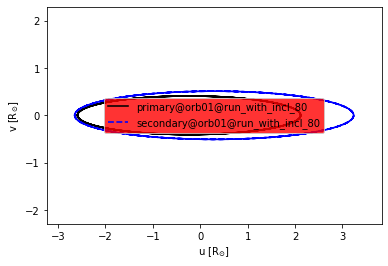

In [28]:
afig, mplfig = b['orb@run_with_incl_80'].plot(show=True, legend=True, legend_kwargs={'loc': 'center', 'facecolor': 'r'})

Other Plotting Options
----------------------

Valid plotting options that are directly passed to matplotlib include:
- linestyle
- marker

Note that sizes (markersize, linewidth) should be handled by passing the size to 's' and attempting to set markersize or linewidth directly will raise an error.  See also the [autofig documention on size scales](http://nbviewer.jupyter.org/github/kecnry/autofig/blob/1.0.0/tutorials/size_modes.ipynb).


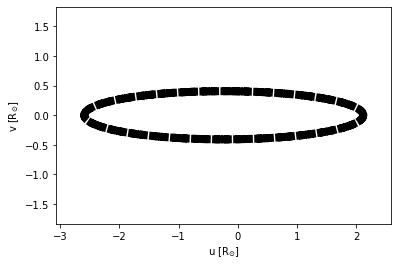

In [29]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(linestyle=':', s=0.1, show=True)

3D Axes
-------------

To plot a in 3d, simply pass projection='3d' to the plot call.  To override the defaults for the z-direction, pass a twig or array just as you would for x or y.

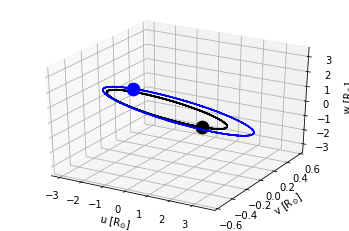

In [30]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=0, projection='3d', show=True)

Next
----------

Next (and last) up: let's [plot meshes](./meshes.ipynb).